# **Importing needed libraries**

In [54]:
#EDA
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from imblearn.over_sampling import SMOTE
import plotly.express as px
#preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer,SimpleImputer
from pandas_profiling import ProfileReport
import seaborn as sns


#Manipulation
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# **Data exploration**

In [55]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)
df.drop('id', axis = 1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Number of stroke patients vs Healthy individuals in Dataset**

In [56]:
fig = px.histogram(df, x='stroke', color='stroke')
fig.update_layout(bargap=0.2)
fig.update_layout(showlegend=False)
fig.show()

## **Gender Distribution of samples**

In [57]:
fig = px.histogram(df, x='gender', color='gender')
fig.update_layout(bargap=0.2)
fig.update_layout(showlegend=False)
fig.show();

In [58]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**The row containing the "Other" Gender will be removed for the remainder of the analysis**

In [59]:
df = df.drop(df[df['gender'] == 'Other'].index)

In [60]:
fig = px.histogram(df, x='gender', color='gender')
fig.update_layout(bargap=0.2)
fig.update_layout(showlegend=False)
fig.show();

## **Age distributions**

**Age distribution for stroke patients and healthy individuals**

In [61]:
fig = px.histogram(df, x='age', color='stroke')
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

More Female cases than males are present in the dataset.

**Age distribution of Stroke and Non-stroke patients divided by gender**

In [62]:
fig = px.box(df,
                y='age',
                x='stroke',
                color='gender',
                points='all')
fig.update_layout(boxgroupgap=0.4)
fig.show()

There are two outliers in the female stroke patient subset

In [63]:
df[(df['stroke'] == 1) & (df['age'] < 30)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


The female at 1.32 years old has no record of BMI and no record of heart disease or hypertension. Therefore her record will be removed for remaining analysis

In [64]:
df = df.drop(df[(df['stroke'] == 1) & (df['age'] == 1.32)].index)

In [65]:
df[(df['stroke'] == 1) & (df['age'] < 30)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1


## **Average Glucose Level Distributions**

**Average Glucose Level distribution for stroke patients and healthy individuals**

In [66]:
fig = px.histogram(df, x='avg_glucose_level', color='stroke')
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

**Average Glucose level distribution of Stroke and Non-stroke patients divided by gender**

In [67]:
fig = px.box(df,
                y='avg_glucose_level',
                x='stroke',
                color='gender',
                points='all')
fig.update_layout(boxgroupgap=0.4)
fig.show()

## **BMI Distributions**

**BMI distribution of stroke patients and healthy individuals**

In [68]:
fig = px.histogram(df, x='bmi', color='stroke')
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

**BMI distribution of Stroke and Non-stroke patients divided by gender**

In [69]:
fig = px.box(df,
                y='bmi',
                x='stroke',
                color='gender',
                points='all')
fig.update_layout(boxgroupgap=0.4)
fig.show()

## **Hypertension Distributions**

**Hypertension distribution of both stroke and non-stroke patients**

In [70]:
fig = px.histogram(df, x='hypertension', color='stroke', barmode='group')
fig.update_layout(bargap=0.2)
fig.show();

## **Heart Disease Distribution**

**Heart Disease distribution of both stroke and non-stroke patients**

In [71]:
fig = px.histogram(df, x='heart_disease', color='stroke', barmode='group')
fig.update_layout(bargap=0.2)
fig.show()

## Smoking Status Distribution

**Smoking status distribution of both stroke and non-stroke patients**

In [72]:
fig = px.histogram(df, x='smoking_status', color='stroke', barmode='group')
fig.update_layout(bargap=0.2)
fig.show()

In [73]:
df[df['smoking_status']=='never smoked']['stroke'].value_counts(normalize=True)

0    0.952431
1    0.047569
Name: stroke, dtype: float64

In [74]:
df[df['smoking_status']=='smokes']['stroke'].value_counts(normalize=True)

0    0.946768
1    0.053232
Name: stroke, dtype: float64

In [75]:
df[df['smoking_status']=='formerly smoked']['stroke'].value_counts(normalize=True)

0    0.920814
1    0.079186
Name: stroke, dtype: float64

## **Correlation between columns**

Text(0.5, 1.0, 'Correlation Matrix of all variables')

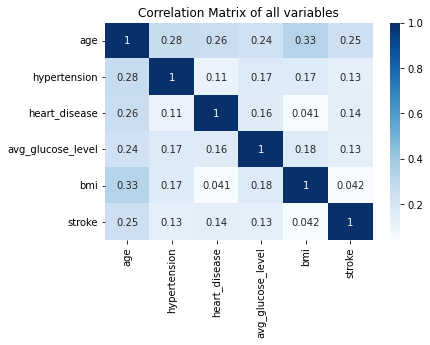

In [76]:
import seaborn as sns
dataplot = sns.heatmap(df.drop('id', axis = 1).corr(), cmap="Blues", annot=True)
dataplot.set_title('Correlation Matrix of all variables')

In [77]:
df.drop('id', axis = 1).corr()['stroke']

age                  0.247398
hypertension         0.128422
heart_disease        0.135371
avg_glucose_level    0.132937
bmi                  0.042341
stroke               1.000000
Name: stroke, dtype: float64

**As evident by the matrix and the column values of stroke, Age has the highest correelation with stroke of all other features. BMI, on the other hand, has the lowest correlation with the features.**

## **Null values**

In [78]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  200
smoking_status         0
stroke                 0
dtype: int64

In [79]:
df[df['bmi'].isnull()]['stroke'].value_counts(normalize=True)

0    0.805
1    0.195
Name: stroke, dtype: float64

# **Modeling**

**Dropping the Residence_type featrue as it showed to be irrelevant** 

In [80]:
df=df.drop('id',axis=1)
df_num = df.copy()
df_num = df_num.drop('Residence_type', axis = 1)
df_num.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  200
smoking_status         0
stroke                 0
dtype: int64

## **Preparing column transformers** 


*   For bmi, we found it's best to use KnnImputer because the meaning and the scale of bmi is dependent on the age. KNN imputer is a suitable choice because it uses information from other features to fill the missing values and BMI is calculated based on gender and age. The same bmi for a child and for an elderly person has different meaning. So, to replace the missing bmi values, we will take into account the neiboghrs to choose a meaningful replacement.
*   Standard scaler is used for numerical features and OneHotEncoding is used for categorical features

*   Binary features are kept as they are.



In [83]:
#Numeric
Imputer = KNNImputer(n_neighbors=5)
#Categorical
ohe = OneHotEncoder(handle_unknown='ignore')

numeric_features = ['age', 'bmi', 'avg_glucose_level']
categorical_features = ['gender', 'ever_married', 'work_type', 'smoking_status']
binary_features = ['hypertension', 'heart_disease']

## **Preprocessing**

In [84]:
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler(), Imputer), numeric_features),
    (ohe, categorical_features),
    remainder='passthrough')

#Target feature
X = df_num.drop('stroke', axis = 1)
y = df_num['stroke'].astype(np.uint8)

preprocessor.fit_transform(X)

array([[ 1.05112983,  0.98114481,  2.70619574, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.78571321,  0.28591513,  2.12141899, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.62619917,  0.45908589, -0.00502188, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.36442547,  0.21715615, -0.51140146, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34335218, -0.41950107,  1.32817196, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03369946, -0.3431022 , -0.46082975, ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
# The transformd dataframe
transformed_column_names = (numeric_features +
                            preprocessor.named_transformers_['onehotencoder'].
                            get_feature_names_out().tolist() + binary_features)
transformed_column_names

['age',
 'bmi',
 'avg_glucose_level',
 'gender_Female',
 'gender_Male',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'hypertension',
 'heart_disease']

In [86]:
X = pd.DataFrame(preprocessor.fit_transform(X),
                 columns=transformed_column_names)

## **Splitting the dataset**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

## **Model Selection and Cross Validation** 

We will create a dictionary for our models and to track the models' performance we will keep some metrics stored in a dataframe

In [88]:
models = {
  'L_regressor': LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'),
  'K Nearest Classifier': KNeighborsClassifier(),
  'Decison Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
  'Stochastic Gradient Descent': SGDClassifier(random_state=42,class_weight='balanced'),
  'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
  'Random Forest Classifier': RandomForestClassifier(random_state=42, class_weight='balanced')
}
models_list =[]
training_accuracy = []
test_accuracy = []
counter = []
precision = []
recall = []
f1 = []

### **Dealing with data imbalance**

We will use oversampling on training data only (X_train and y_train)

In [89]:
over = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5)

X_train_over,y_train_over=over.fit_resample(X_train,y_train)

**Now, we will try the following models and test the acuracy of each on the test data:**


1.   Logistic regression
2.   K-Nearest Classifier
3. Decision Trees
4. Stocahstic Gradient Descent Classifier
5. Gradient Boosting Classifier
6. Random Forest Classifier



### Running models

In [90]:
for model, d in models.items():
  print(model)
  print(50*'=')
  #steps = [('pre_processing',preprocessor), ('o', over), ('u', under), ('m', d)]
  
  d.fit(X_train_over, y_train_over)
  predictions = d.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  t_pred = d.predict(X_train_over)
  t_acc = accuracy_score(y_train_over, t_pred)
  count = Counter(predictions)

  #calculating the f Score
  report = precision_recall_fscore_support(y_test,
                                           predictions,
                                           average='binary'    
                                            )
  print(model + ' report:')
  print(classification_report(y_test, predictions))
  print(50*'=')
  
  #Saving the model and its scores
  models_list.append(model)
  training_accuracy.append(t_acc)
  counter.append(count)
  test_accuracy.append(acc)
  precision.append(report[0])
  recall.append(report[1])
  f1.append(report[2])

L_regressor
L_regressor report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1459
           1       0.12      0.72      0.21        74

    accuracy                           0.74      1533
   macro avg       0.55      0.73      0.53      1533
weighted avg       0.94      0.74      0.82      1533

K Nearest Classifier
K Nearest Classifier report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1459
           1       0.13      0.43      0.20        74

    accuracy                           0.83      1533
   macro avg       0.55      0.64      0.55      1533
weighted avg       0.93      0.83      0.87      1533

Decison Tree
Decison Tree report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1459
           1       0.13      0.27      0.17        74

    accuracy                           0.88      1533
   macro avg

We can then collect all the models' results into one data frame for better visualtization



In [91]:
models_results=pd.DataFrame({'model': models_list,'train_accuracy':t_acc,'test_accuracy':acc,'test_percision':precision,'test_recall':recall,'test_f1':f1,'counter':counter})

In [92]:
models_results

,model,train_accuracy,test_accuracy,test_percision,test_recall,test_f1,counter
0,L_regressor,1.0,0.921722,0.125000,0.716216,0.212851,"{0: 1109, 1: 424}"
1,K Nearest Classifier,1.0,0.921722,0.130612,0.432432,0.200627,"{0: 1288, 1: 245}"
2,Decison Tree,1.0,0.921722,0.128205,0.270270,0.173913,"{0: 1377, 1: 156}"
3,Stochastic Gradient Descent,1.0,0.921722,0.123644,0.770270,0.213084,"{0: 1072, 1: 461}"
4,Gradient Boosting Classifier,1.0,0.921722,0.149780,0.459459,0.225914,"{0: 1306, 1: 227}"
5,Random Forest Classifier,1.0,0.921722,0.205128,0.216216,0.210526,"{0: 1455, 1: 78}"


Our model aims to predict when a patient is likely to have a stroke. In general it is much riskier to have a false negative predicition than a false positive predicition. In this kind of cases we prefer a higher recall score (lease false negative classifications). After looking at the scores of the chosen 4 models, we see that logisitic regression and stochastic gradient descent achieve the best recall scores but with many false positives. To get more accurate information about the other metrics we will run cross-validation on the selected models.

### Cross Validation

We will use startified k-fold for cross-validating our data. With oversampling the method should only be done on the training data and then get the models' metrics after running on the non-transformed stratified test data. To facilitate our work, we can combine the preprocessing and the modeling in a single pipeline before moving on to tunning the hyper-parameter. The pipeline will have the preprocessor object along with the oversampler and the classifier, which will simplify the modeling process and provide a clean way of representing the data. We will start with the original dataframe df and redefine the preprocessor.

In [93]:
#simple imputer for categorical features
imp_simple=SimpleImputer(strategy='constant')
imp_KNN=KNNImputer(n_neighbors=5, add_indicator=True)
#since that we are working on the original dataset we have to return back the residence type feature
categorical_features = ['gender', 'ever_married', 'work_type','Residence_type' ,'smoking_status']

#redefining the preprocessor
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler(), imp_KNN), numeric_features),
    (make_pipeline(imp_simple,ohe), categorical_features),
    remainder='passthrough')

y=df['stroke']
X=df.drop(['stroke'],axis=1)

We will use the same models dictionary and metrics dataframe for cross-validation

In [94]:
models_list =[]
train_accuracy = []
test_accuracy = []
count_list = []
precision = []
recall = []
f1 = []
roc=[]
for model, clf in models.items():
  print(model)
  print(50*'#')

  pipeline = make_pipeline(preprocessor,over, clf)

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

  scores = cross_validate(pipeline,
                            X,
                            y,
                            scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                            cv=cv,
                            n_jobs=-1)
  
  models_list.append(model)
  test_accuracy.append(scores['test_accuracy'].mean())
  precision.append(scores['test_precision'].mean())
  recall.append(scores['test_recall'].mean())
  f1.append(scores['test_f1'].mean())
  roc.append(scores['test_roc_auc'].mean())

# Putting it all together in the dataframe
cv_results = pd.DataFrame({
    "model": models_list,
    'test_acc': test_accuracy,
    'test_precision': precision,
    'test_recall': recall,
    'test_f1': f1,
    'test_roc_auc': roc
})
cv_results

L_regressor
##################################################
K Nearest Classifier
##################################################
Decison Tree
##################################################
Stochastic Gradient Descent
##################################################
Gradient Boosting Classifier
##################################################
Random Forest Classifier
##################################################


,model,test_acc,test_precision,test_recall,test_f1,test_roc_auc
0,L_regressor,0.754041,0.140261,0.790531,0.238108,0.846824
1,K Nearest Classifier,0.836922,0.109207,0.329524,0.163816,0.664402
2,Decison Tree,0.884232,0.122763,0.224435,0.157988,0.571168
3,Stochastic Gradient Descent,0.743144,0.136224,0.790503,0.231477,0.843313
4,Gradient Boosting Classifier,0.890693,0.176593,0.337605,0.230943,0.804783
5,Random Forest Classifier,0.931937,0.177071,0.107537,0.132208,0.797102


### **Crossvalidation with manually combining over sampling and undersampling**

In [95]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
#pipeline = imbpipeline(steps=[('o', over), ('u', under)])

In [96]:
models_list = []
test_accuracy = []
precision = []
recall = []
f1 = []
roc = []

for model, d in models.items():
  print(model)
  print(50*'=')
  pipeline = make_pipeline(preprocessor,over,under, d)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
  scores = cross_validate(pipeline,
                            X,
                            y,
                            scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                            cv=cv,
                            n_jobs=-1)
  models_list.append(model)
  test_accuracy.append(scores['test_accuracy'].mean())
  precision.append(scores['test_precision'].mean())
  recall.append(scores['test_recall'].mean())
  f1.append(scores['test_f1'].mean())
  roc.append(scores['test_roc_auc'].mean())

# Putting it all together in the dataframe
results_cv = pd.DataFrame({
    "model": models_list,
    'test_acc': test_accuracy,
    'test_precision': precision,
    'test_recall': recall,
    'test_f1': f1,
    'test_roc_auc': roc
})
results_cv

L_regressor
K Nearest Classifier
Decison Tree
Stochastic Gradient Descent
Gradient Boosting Classifier
Random Forest Classifier


,model,test_acc,test_precision,test_recall,test_f1,test_roc_auc
0,L_regressor,0.748493,0.138040,0.794585,0.235048,0.845632
1,K Nearest Classifier,0.794897,0.118123,0.498748,0.190770,0.738047
2,Decison Tree,0.809906,0.111644,0.418259,0.175833,0.624081
3,Stochastic Gradient Descent,0.670977,0.118109,0.815673,0.202802,0.826317
4,Gradient Boosting Classifier,0.863480,0.175090,0.486721,0.257173,0.830688
5,Random Forest Classifier,0.876793,0.173710,0.410313,0.243153,0.821466


Based on the results of the crossvalidation we will be preforming the hyperparamater tunning on two models only which are Logistic Regression and Stochastic Gradient Descent

# Hyperparamter Tunning

## Logistic Regression
We will modify our pipeline a little bit first then construct a list of our paramters to run it by the grid search

In [ ]:
over=SMOTE()
pipeline=make_pipeline(preprocessor,over,LogisticRegression(max_iter=500))
pipeline.get_params()

In [98]:
param_grid={}
param_grid['logisticregression__C']=[100, 10, 1.0, 0.1, 0.01]
param_grid['logisticregression__penalty']=['l2']
param_grid['logisticregression__solver']=['newton-cg', 'lbfgs', 'liblinear']

In [99]:
grid=GridSearchCV(pipeline,param_grid,cv=cv,scoring='recall',n_jobs=-1)
grid_search=grid.fit(X, y)

In [100]:
grid.best_score_
#best recall score found in the grid search for logistic regression

0.8013061224489797

In [101]:
LR_bestparams=grid.best_params_
LR_bestparams
#best combination of parameters that produced the best recall score

{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [102]:
pd.set_option('display.max_colwidth',None)
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values('rank_test_score').head(5)

,params,mean_test_score,rank_test_score
14,"{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.801306,1
12,"{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}",0.797279,2
10,"{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.795918,3
13,"{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.794585,4
3,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}",0.793252,5


## Stochastic Gradient Descent


Performing the same steps as in LogReg

In [ ]:
pipeline=make_pipeline(preprocessor,over, SGDClassifier(random_state=42, class_weight='balanced', max_iter=10000))
pipeline.get_params()

In [104]:
param_grid={}
param_grid['sgdclassifier__loss']=['hinge', 'log','modified_huber']
param_grid['sgdclassifier__penalty']=['l1','l2']
param_grid['sgdclassifier__alpha']=[0.0001,0.001,0.01,0.1,1]

In [105]:
grid=GridSearchCV(pipeline,param_grid,cv=cv,scoring='recall',n_jobs=-1)
grid_search=grid.fit(X, y)

In [106]:
grid.best_score_
#best recall score found in the grid search for SGD

0.8656326530612245

In [107]:
SGD_bestparams=grid.best_params_
SGD_bestparams
#best combination of parameters that produced the best recall score

{'sgdclassifier__alpha': 0.1,
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__penalty': 'l1'}

In [108]:
pd.set_option('display.max_colwidth',None)
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values('rank_test_score').head(5)

,params,mean_test_score,rank_test_score
18,"{'sgdclassifier__alpha': 0.1, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l1'}",0.865633,1
25,"{'sgdclassifier__alpha': 1, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l2'}",0.864490,2
19,"{'sgdclassifier__alpha': 0.1, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l2'}",0.844299,3
20,"{'sgdclassifier__alpha': 0.1, 'sgdclassifier__loss': 'log', 'sgdclassifier__penalty': 'l1'}",0.840054,4
22,"{'sgdclassifier__alpha': 0.1, 'sgdclassifier__loss': 'modified_huber', 'sgdclassifier__penalty': 'l1'}",0.834721,5


# Creating Models
We will then construct pipelines for our two chosen models and fit the training data using them and look at our predictions after tunning and optimizing the hyperparameters.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
over=SMOTE(random_state=42)
LR_pipeline=make_pipeline(preprocessor,over,LogisticRegression(C=0.01,penalty='l2',solver='liblinear',max_iter=500))
SGD_pipeline=make_pipeline(preprocessor,over,SGDClassifier(loss='hinge',alpha=0.1,penalty='l1',class_weight='balanced',random_state=42,max_iter=1000))

In [111]:
LR_pipeline.fit(X_train,y_train)
LR_predictions=LR_pipeline.predict(X_test)
print(classification_report(y_test,LR_predictions))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       961
           1       0.15      0.79      0.25        61

    accuracy                           0.72      1022
   macro avg       0.57      0.75      0.54      1022
weighted avg       0.93      0.72      0.79      1022



In [112]:
SGD_pipeline.fit(X_train,y_train)
SGD_predictions=SGD_pipeline.predict(X_test)
print(classification_report(y_test,SGD_predictions))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       961
           1       0.13      0.84      0.23        61

    accuracy                           0.67      1022
   macro avg       0.56      0.75      0.51      1022
weighted avg       0.93      0.67      0.75      1022



## **Confusoion Matrix and ROC Curve**

### Logsitic Regression

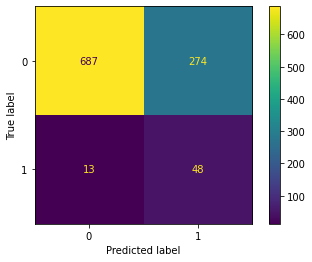

In [113]:
disp= ConfusionMatrixDisplay.from_estimator(LR_pipeline,X_test,y_test)

Auc :  0.8268367990992989


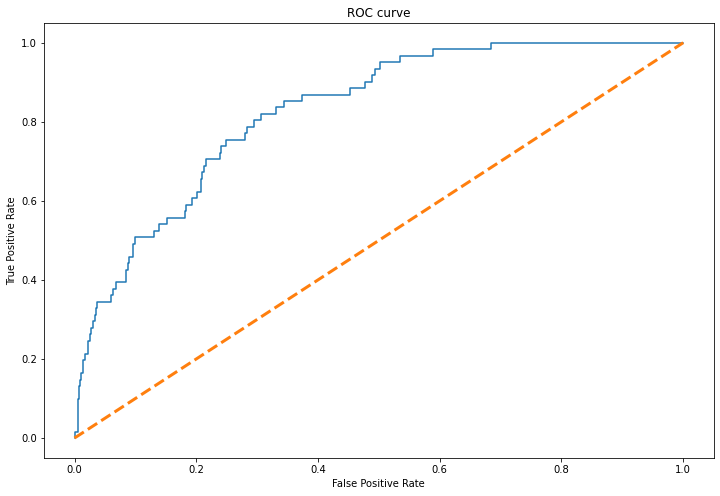

In [114]:
FalsePositiveRate_LR, TruePositiveRate_LR, _ = roc_curve(y_test, LR_pipeline.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,8));

plt.plot(FalsePositiveRate_LR, TruePositiveRate_LR);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], lw=3, linestyle='--');

print('Auc : ', auc(FalsePositiveRate_LR, TruePositiveRate_LR))

### Stochastic Gradient Descent

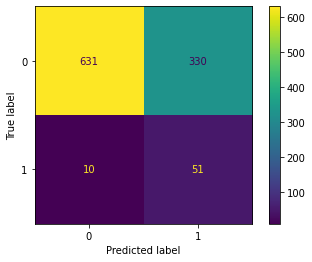

In [115]:
disp= ConfusionMatrixDisplay.from_estimator(SGD_pipeline,X_test,y_test)

Auc :  0.8248579860459562


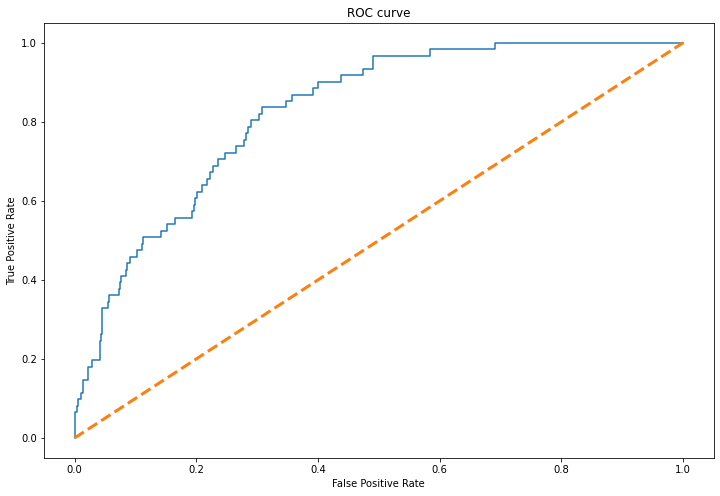

In [116]:
FalsePositiveRate_LR, TruePositiveRate_LR, _ = roc_curve(y_test, SGD_pipeline.decision_function(X_test))

plt.figure(figsize=(12,8));

plt.plot(FalsePositiveRate_LR, TruePositiveRate_LR);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], lw=3, linestyle='--');

print('Auc : ', auc(FalsePositiveRate_LR, TruePositiveRate_LR))

## Plotting Feature Importance _ Logistic Regression

Extracting features names and theri corresponding coefficients from the pipeline

In [117]:
coefs = LR_pipeline['logisticregression'].coef_.flatten()
ohe_features=preprocessor.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names_out().tolist()
features_transformed=(numeric_features+ohe_features+binary_features)

Text(0.5, 0, 'Feature Name')

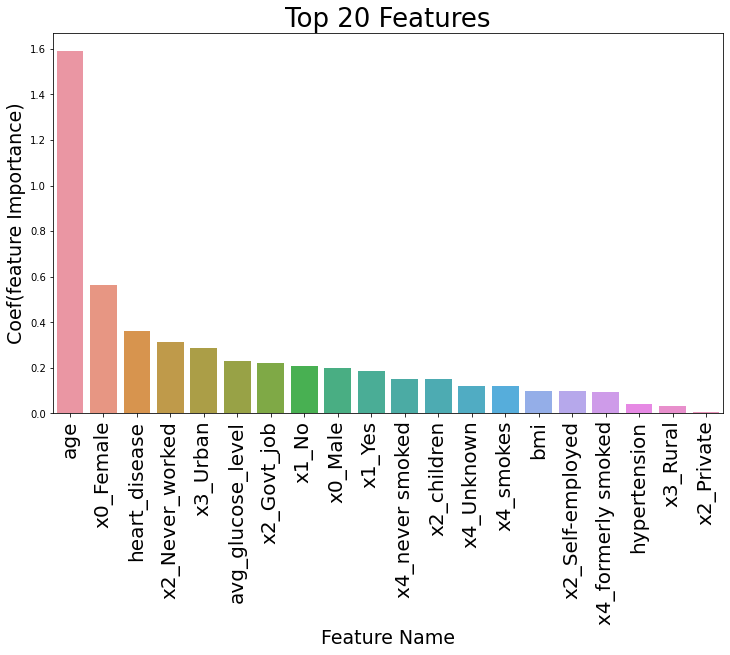

In [119]:
f_imp=zip(features_transformed,coefs)
f_imp_df=pd.DataFrame(f_imp,columns=["feature","Importance"])
f_imp_df["absolute"] = f_imp_df["Importance"].apply(lambda x: abs(x))
f_imp_df = f_imp_df.sort_values("absolute", ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature", y="absolute", data=f_imp_df.head(20))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=26)
ax.set_ylabel("Coef(feature Importance)", fontsize=19)
ax.set_xlabel("Feature Name", fontsize=19)

# Final Model and Making Predictions

After comparing both models, we will pick one of them and run it on the full dataset. We can see that logistic regression performed on average better than SGD across all the tests. We will choose the logistic regression model and tune it with our hyperparameters


In [120]:
imp_simple=SimpleImputer(strategy='constant')
imp_KNN=KNNImputer(n_neighbors=5)
ohe = OneHotEncoder(handle_unknown='ignore')
#redefining the preprocessor
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler(), imp_KNN), numeric_features),
    (make_pipeline(imp_simple,ohe), categorical_features),
    remainder='passthrough')
over = SMOTE(random_state=42)

LR_pipeline=make_pipeline(preprocessor,over,LogisticRegression(C=0.01,penalty='l2',solver='liblinear',max_iter=500))

LR_pipeline.fit(X, y)
LR_predictions = LR_pipeline.predict(X)
print(classification_report(y, LR_predictions))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      4860
           1       0.13      0.80      0.23       248

    accuracy                           0.74      5108
   macro avg       0.56      0.77      0.53      5108
weighted avg       0.94      0.74      0.81      5108



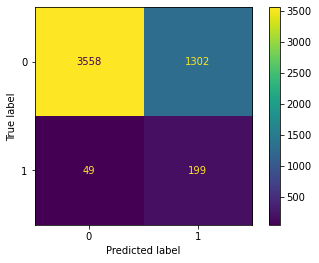

In [121]:
disp = ConfusionMatrixDisplay.from_estimator(LR_pipeline,X,y, display_labels=LR_pipeline.classes_);

# Predicting Stroke Risk

Finally after choosing the model and optimzing it to achieve our target we can write a function that takes the patient's data and calculate the probability (risk) of them getting stoke

In [122]:
def stroke_risk(patient_data):
  ''' The input has to be a dictionary with keys similar to the features' names
  of the dataset and the output is going to be the probability of having stroke '''
  input = pd.DataFrame(patient_data)
  model_prediction=LR_pipeline.predict_proba(input)
  print('The predicted probability of Stroke', round(model_prediction[0][1],2)*100)
  return model_prediction

We will test our model on a 49 year old male who has history of heart disease, never smoked, married, has relatively high average glucose level and normal BMI

In [123]:
Patient1 = {
    'gender': ['Male'],
    'age': [49.0],
    'hypertension': [0],
    'heart_disease': [1],
    'ever_married': ['Yes'],
    'work_type': ['Govt_job'],
    'Residence_type': ['Rural'],
    'avg_glucose_level': [130.00],
    'bmi': [24.6],
    'smoking_status': ['never smoked']
}
stroke_risk(Patient1)

The predicted probability of Stroke 28.000000000000004


array([[0.72223229, 0.27776771]])

Predictions show that this man has 28% chance of having stroke which is not very high but also definetly not low!